In [1]:
import numpy as np
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from matplotlib.colors import LinearSegmentedColormap

## Choisir un jeu de donnée à visualiser

In [2]:
# # 1 JEU DE DONNEES BRUT
# CSV_PATH ="../data/cardio_train.csv"

# # 2 JEU DE DONNEES NETTOYE
# CSV_PATH ="../data/cardio_train_clean.csv"

# 3 JEU DE DONNEES OPTIMISE
CSV_PATH ="../data/cardio_optimized.csv"


df = pd.read_csv(CSV_PATH, sep=";", index_col="id")


In [3]:
# Pas de doublon
df.index.is_unique

True

---
## Visualisation

In [4]:
# Converti l'âge en année
df["age"] = df["age"] / 365

In [5]:
df.shape

(68562, 15)

In [6]:
# Valeurs manquantes - ligne
df.dropna().shape
# Valeurs manquantes - ligne
df.dropna(axis=1).shape

(68562, 15)

In [7]:
df.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,female,male,imc,pressure
count,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000
mean,0.146100,164.471150,74.143089,126.625959,81.364954,1.364969,1.225898,0.088125,0.053616,0.196567,0.494939,0.650958,0.349042,1.880911,2.205274
std,0.018522,7.797999,14.255469,16.738005,9.550331,0.679182,0.571863,0.283478,0.225259,0.397405,0.499978,0.476671,0.476671,0.791399,0.663634
min,0.081051,140.000000,40.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.132543,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,0.147870,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000
75%,0.160053,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,3.000000
max,0.177992,207.000000,200.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000


Les ages sont compris entre 29 et 64 ans.
Toutes les observations sont des adultes.

In [8]:
df.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,female,male,imc,pressure
id,,,,,,,,,,,,,,,
0,0.138060,168,62.0,110,80,1,1,0,0,0,0,0.0,1.0,1,2
1,0.151833,156,85.0,140,90,3,1,0,0,0,1,1.0,0.0,3,3
2,0.141543,165,64.0,130,70,3,1,0,0,1,1,1.0,0.0,1,2
3,0.132280,169,82.0,150,100,1,1,0,0,0,1,0.0,1.0,2,3
4,0.131162,156,56.0,100,60,1,1,0,0,1,0,1.0,0.0,1,1


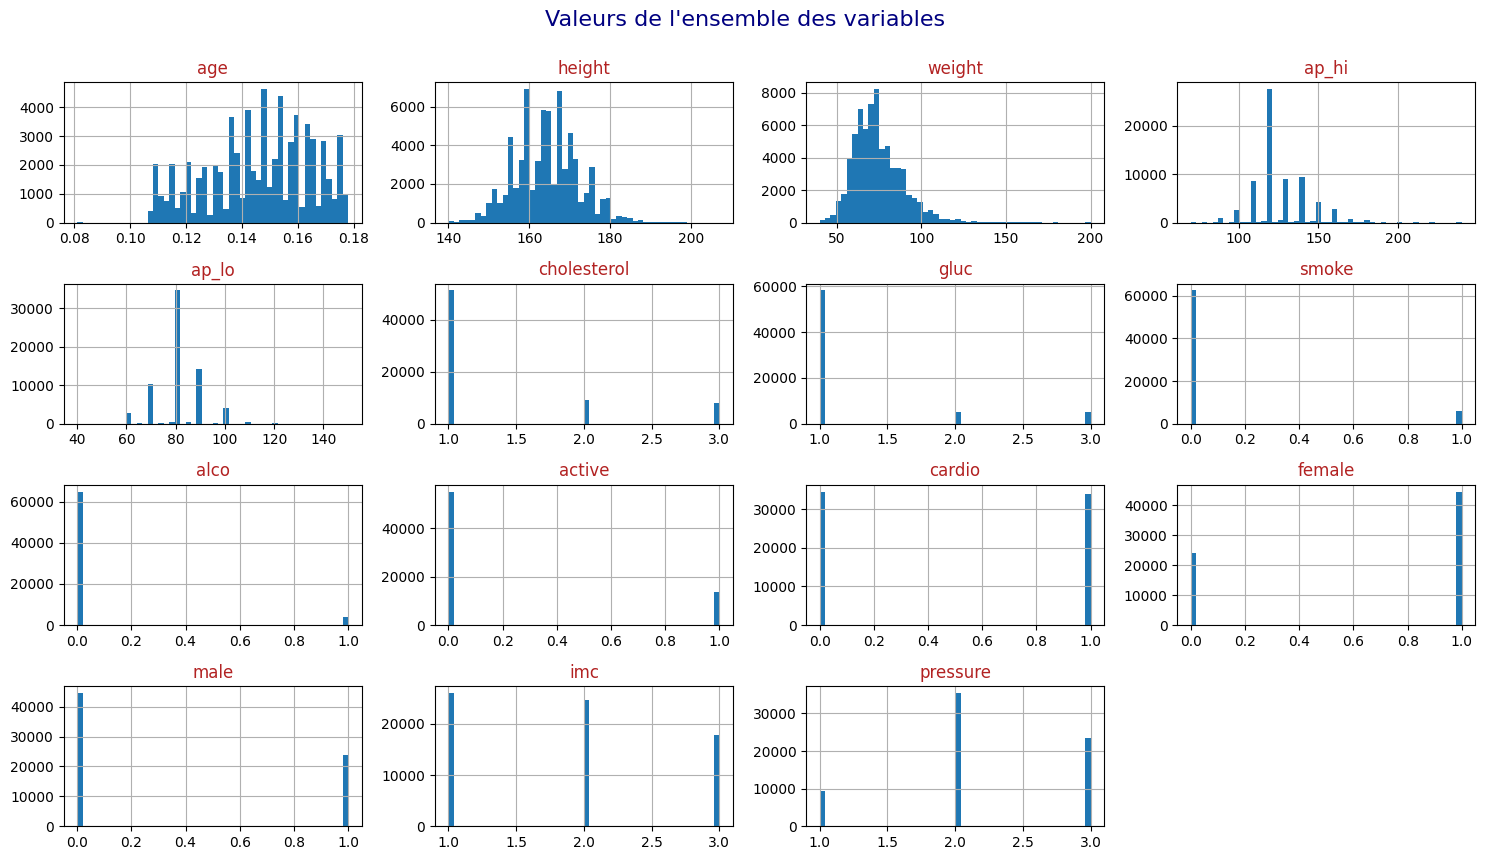

In [9]:
axes = df.hist(bins=50, figsize=(15,9))
plt.suptitle("Valeurs de l'ensemble des variables", fontsize=16, color="navy")
# Modifier la couleur des titres individuels
for ax in axes.ravel():  # ravel() aplatit la grille d'axes
    ax.set_title(ax.get_title(), color='firebrick')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

Text(0.5, 1.0, 'Matrice de corrélation')

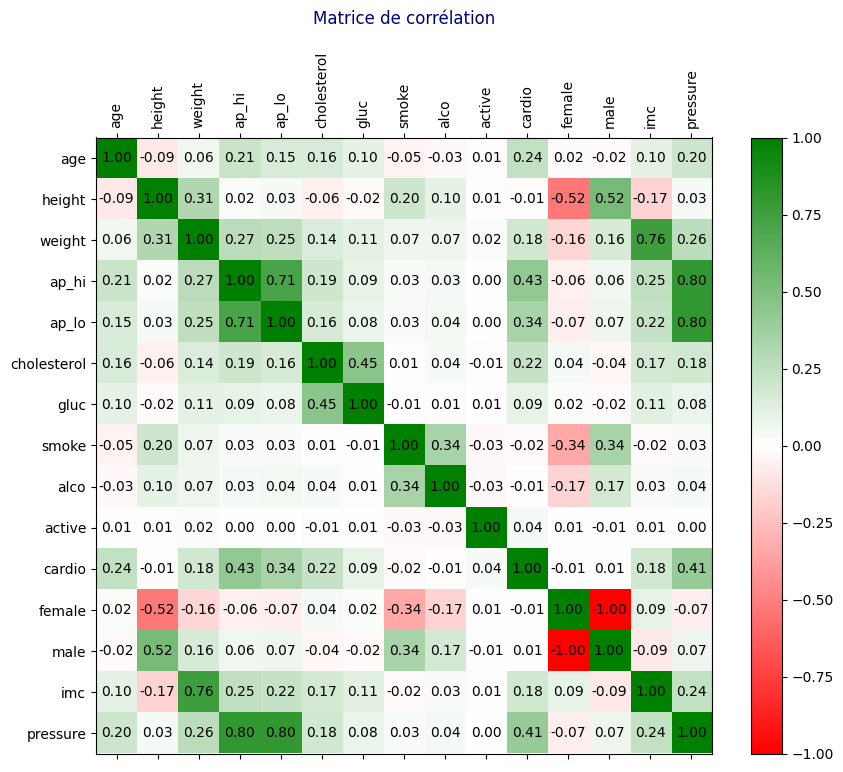

In [10]:
# Création d'une colormap rouge → blanc → vert
cmap = LinearSegmentedColormap.from_list("red_green", ["red", "white", "green"], N=256)

corr = df.corr()

# Tracé de la matrice
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap=cmap, vmin=-1, vmax=1)

# Axes et titre
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Matrice de corrélation", pad=20)
plt.colorbar(cax)

# Ajouter les valeurs dans chaque case
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black')

plt.title("Matrice de corrélation", pad=20, color="navy")
# plt.show()

In [11]:
# df_numerical = ['height', 'weight', 'age_year', 'ap_hi', 'ap_lo']
df_numerical = ['height', 'weight', 'age', 'ap_hi', 'ap_lo']
df_cardinal = ['smoke', 'alco', 'active', 'cardio', 'gender']
df_ordinal = ['cholesterol', 'gluc']

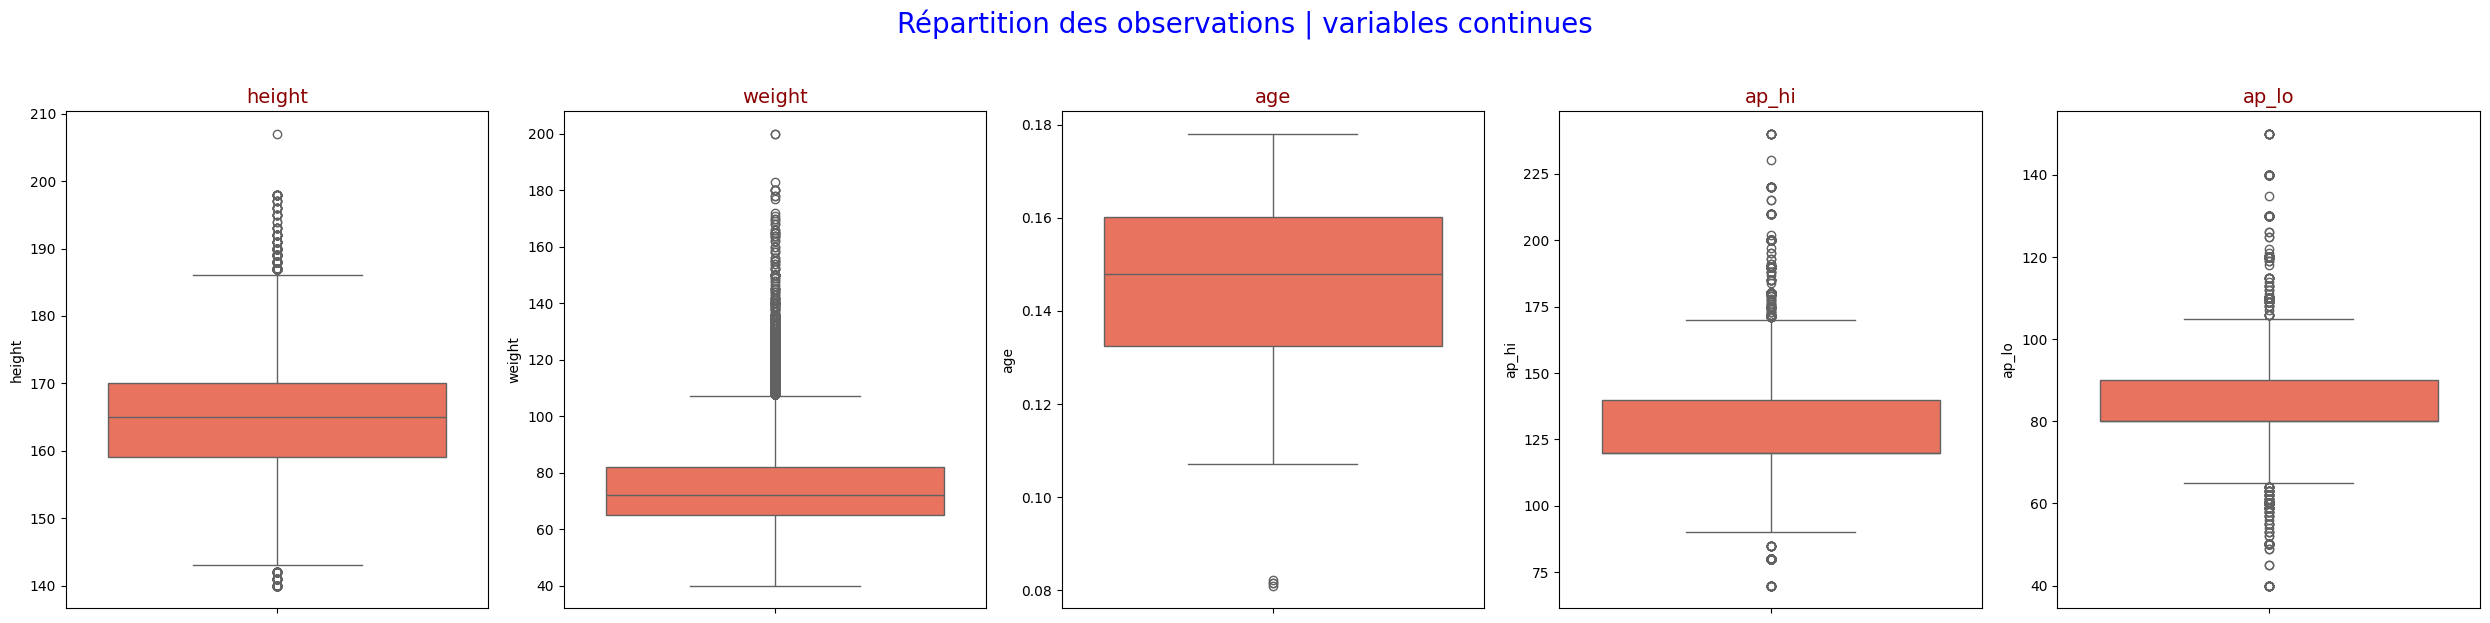

In [12]:
fig, axes = plt.subplots(1, len(df_numerical), figsize=(5 * len(df_numerical), 6))

for ax, col in zip(axes, df_numerical):
    sns.boxplot(y=df[col], ax=ax, color='tomato')
    ax.set_title(col, fontsize=14, color='darkred')

plt.suptitle("Répartition des observations | variables continues", fontsize=20, color="blue", y=1.03)
plt.tight_layout()


In [13]:
df['alco'].value_counts()

alco
0    64886
1     3676
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68562 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68562 non-null  float64
 1   height       68562 non-null  int64  
 2   weight       68562 non-null  float64
 3   ap_hi        68562 non-null  int64  
 4   ap_lo        68562 non-null  int64  
 5   cholesterol  68562 non-null  int64  
 6   gluc         68562 non-null  int64  
 7   smoke        68562 non-null  int64  
 8   alco         68562 non-null  int64  
 9   active       68562 non-null  int64  
 10  cardio       68562 non-null  int64  
 11  female       68562 non-null  float64
 12  male         68562 non-null  float64
 13  imc          68562 non-null  int64  
 14  pressure     68562 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 10.4 MB


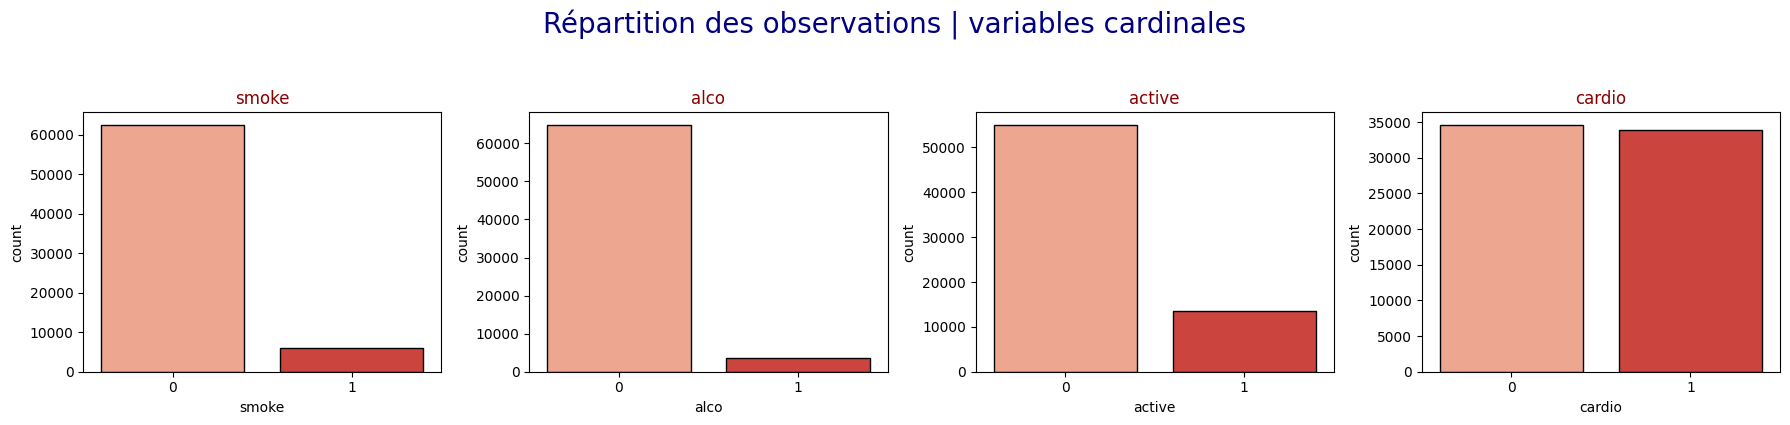

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

for ax, col in zip(axes, df_cardinal):
    sns.countplot(x=col, data=df, hue=col, palette='Reds', legend=False, ax=ax)
    ax.set_title(col, color='darkred')

    # Ajouter une bordure noire aux barres
    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(1)

plt.suptitle("Répartition des observations | variables cardinales", fontsize=20, color='navy', y=1.05)
plt.tight_layout()


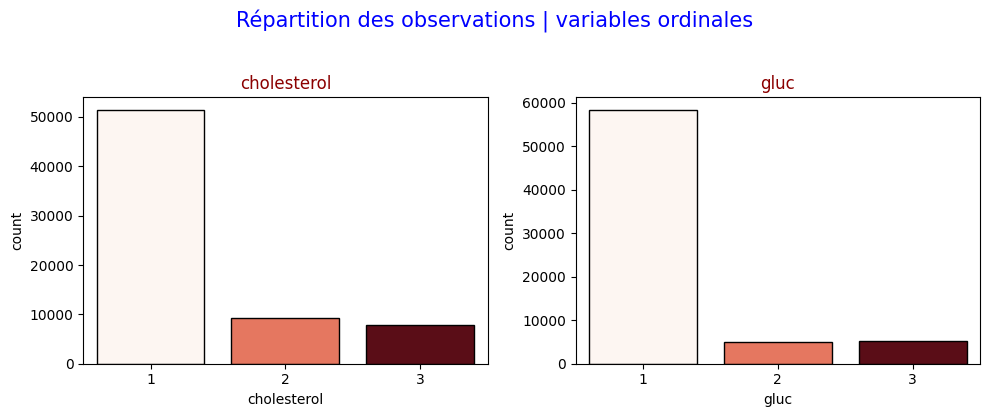

In [16]:
fig, axes = plt.subplots(1, len(df_ordinal), figsize=(5 * len(df_ordinal), 4))

for ax, col in zip(axes, df_ordinal):
    sns.countplot(x=col, data=df, hue=col, palette='Reds', legend=False, ax=ax)
    ax.set_title(col, color='darkred')

    # Bordure noire aux barres
    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(1)

plt.suptitle("Répartition des observations | variables ordinales", fontsize=15, color="blue", y=1.03)
plt.tight_layout()

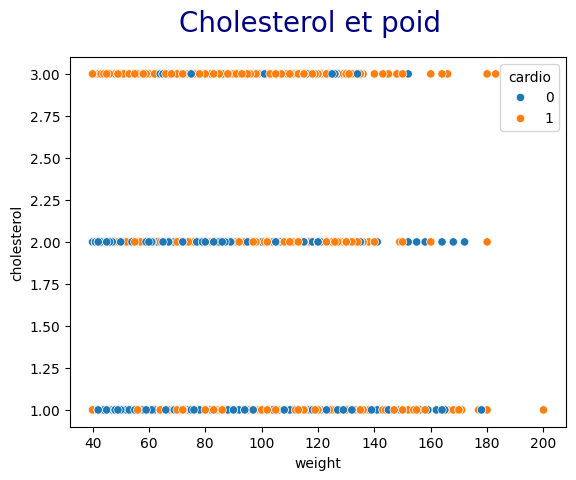

In [17]:
sns.scatterplot(data=df, x='weight', y='cholesterol', hue='cardio')
plt.suptitle("Cholesterol et poid", color="navy", fontsize=20)
plt.show()

Le cholesterol semble être un facteur aggravant

Text(0.5, 0.98, "Nombre des cas en fonction de l'âge")

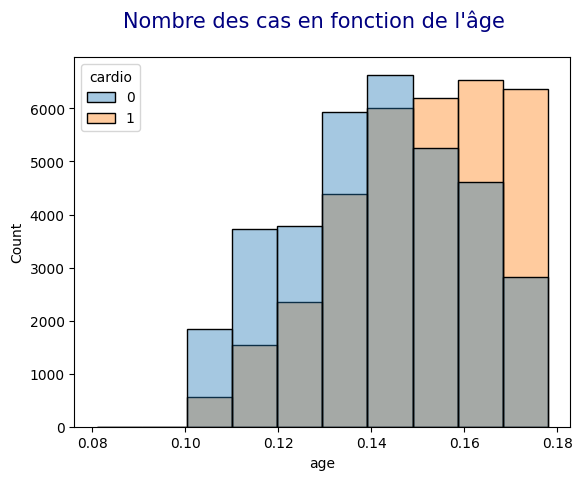

In [18]:
sns.histplot(
    data=df,
    x='age',
    hue='cardio',
    bins=10,
    multiple='layer',  # empile les deux couleurs légèrement
    alpha=0.4,          # transparence pour voir les deux
    stat='count'        # on affiche les quantités réelles
)
plt.suptitle("Nombre des cas en fonction de l'âge", color="navy", fontsize=15)

Text(0.5, 0.98, 'Nombre des cas en fonction du poid')

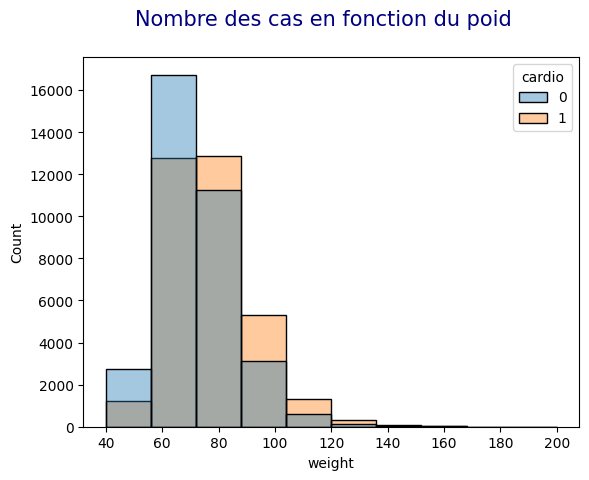

In [19]:
sns.histplot(
    data=df,
    x='weight',
    hue='cardio',
    bins=10,
    multiple='layer',  # empile les deux couleurs légèrement
    alpha=0.4,          # transparence pour voir les deux
    stat='count'        # on affiche les quantités réelles
)
plt.suptitle("Nombre des cas en fonction du poid", color="navy", fontsize=15)

Text(0.5, 0.98, 'Tension diastolique')

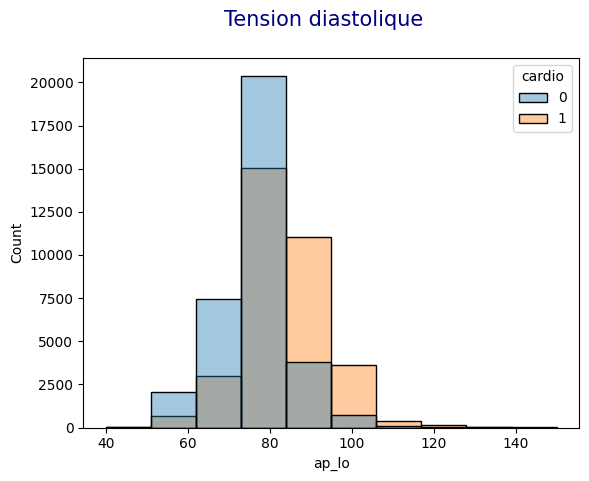

In [20]:
sns.histplot(
    data=df,
    x='ap_lo',
    hue='cardio',
    bins=10,
    multiple='layer',  
    alpha=0.4,        
    stat='count'        
)
plt.suptitle("Tension diastolique", color="navy", fontsize=15)

Text(0.5, 0.98, 'Tension sistolique')

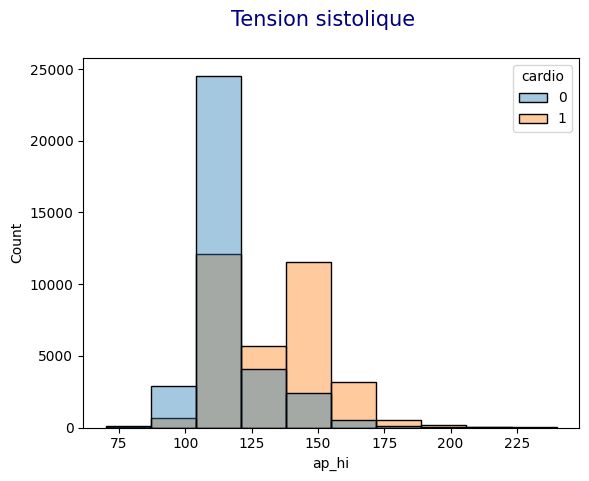

In [21]:
sns.histplot(
    data=df,
    x='ap_hi',
    hue='cardio',
    bins=10,
    multiple='layer', 
    alpha=0.4,         
    stat='count'        
)
plt.suptitle("Tension sistolique", color="navy", fontsize=15)

In [22]:
df['cholesterol'].value_counts()

cholesterol
1    51407
2     9287
3     7868
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x1d8dbc20530>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

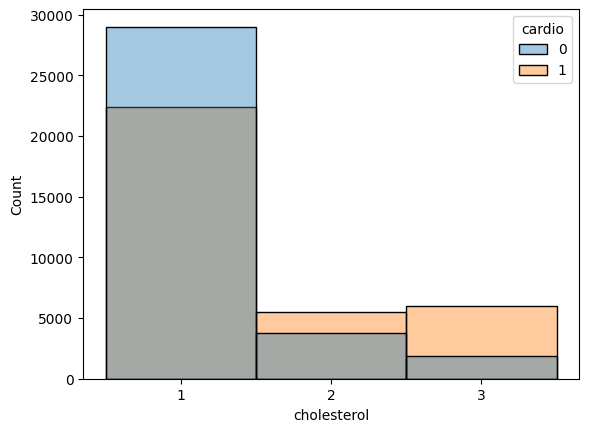

In [ ]:
sns.histplot(
    data=df,
    x='cholesterol',
    hue='cardio',
    # Variable discrète/catégorielle, on remplae bins par discrete
    # bins=10,
    discrete=True,
    multiple='layer', 
    alpha=0.4,         
    stat='count'        
)
plt.xticks([1,2,3], labels=['1', '2', '3'])